## 0. Introduction

The purpose of this notebook is to explore geometric Brownian motion (GBM) with reference to chapter 3 from *Stochastic Calculus for Finance II Continuous-Time Models* (Shreve, 2008).

## 1. Brownian Motion

Brownian motion is a continuous stochastic process $W(t), t \geq 0$, that has independent, normally distributed increments. For Brownian motion starting at $0$, if $0 = t_0 < t_1 < \cdots < t_m$, then the increments

$$ W(t_1) - W(t_0), W(t_2) - W(t_1), \ldots, W(t_m) - W(t_{m-1}) $$

are independent and normally distributed with

$$ \mathbb{E}[W(t_{i+1}) - W(t_i)] = 0, \quad \text{Var}[W(t_{i+1}) - W(t_i)] = t_{i+1} - t_i. $$

Two important classes of adapted stochastic processes are **martingales** and **Markov processes**. Let $(\Omega, \mathcal{F}, \mathbb{P})$ be a probability space, let $T$ be a fixed positive number, let $\mathcal{F}(t), 0 \leq t \leq T$, be a filtration of sub-$\sigma$-algebras of $\mathcal{F}$. 

Consider an adpated stochastic process $M(t), 0 \leq t \leq T$. A martingale has the property that

$$ \mathbb{E}[M(t) \mid \mathcal{F}(s)] = M(s) \text{ for all } 0 \leq s \leq t \leq T. $$

If $\mathbb{E}[M(t) \mid \mathcal{F}(s)] \geq M(s)$ when $0 \leq s \leq t \leq T$, we have a *submartingale*. If the inequality is reversed, we have a *supermartingale*.

Consider another adapated stochastic process $X(t), 0 \leq t \leq T$. A Markov process has the property that whenever $0 \leq s \leq t \leq T$ and we are given a function $f$, there is another function $g$ such that

$$ \mathbb{E}[f(X(t)) \mid \mathcal{F}(s)] = g(X(s)). $$

The important feature here is that the estimate of $f(X(t))$ made at time $s$ depends only on the process value $X(s)$ at time $s$ and not on the path of the process before time $s$.

Brownian motion is both a martingale and a Markov process. Its transition density is

$$ p(\tau, x, y) = \frac{1}{\sqrt{2\pi \tau}} \exp \left\{-\frac{(y - x)^2}{2 \tau}\right\}. $$

This is the density in the variable $y$ for the random variable $W(s + \tau)$ given that $W(s) = x$. 

A profound property of Brownian motion is that it accumulates quadratic variation at rate one per unit time. If we choose a time interval $[T_1, T_2]$, choose partition points $T_1 = t_0 < t_1 < \cdots < t_m = T_2$, and compute $\sum_{j=0}^{m-1} (W(t_{j+1}) - W(t_j))^2$, we get an answer that depends on the path along which the computation is done. However, if we let the number of partition points approach infinity and the length of the longest subinterval $t_{j+1} - t_j$ approach zero, this quantity has limit $T_2 - T_1$, the length of the interval over which the quadratic variation is being computed. We write $dW(t) \, dW(t) = dt$ to symbolize the fact that the amount of quadratic variation Brownian motion accumulates in an interval is equal to the length of the interval, *regardless of the path along which we do the computation*.

## 2. Geometric Brownian Motion

GBM was popularised in financial mathematics by Fisher Black and Myron Scholes when they used it to derive the Black-Scholes equation. GBM is essentially Brownian motion with a drift component and volatility component. The stochastic differential equation (SDE) which describes the evolution of a GBM stochastic process is

$$ dS_t = \mu S_t \, dt \, + \sigma S_t \, dW_t, $$

where $dS_t$ is the change in the asset price, $S$, at time $t$; $\mu$ is the drift coefficient (the expected rate of return of the asset); $dt$ is the time increment; $\sigma$ is the volatility coefficient (the expected fluctuation of the asset); and $W_t$ is a Wiener process a.k.a Brownian Motion.

The solution to this SDE can be obtained using Itô's Lemma, which transforms the equation into a form that can be integrated. The explicit solution for $S_t$, given an initial value $S_0$ is
​
$$ S_t = S_0 \, \exp \left\{\left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t\right\}. $$

This expression shows that the asset price $S_t$ evolves over time as a function of both deterministic and stochastic components. The term $\left( \mu - \frac{\sigma^2}{2} \right) t$ represents the deterministic trend, adjusted for the volatility's effect on the average growth rate. The term $\sigma W_t$ introduces randomness, scaled by the volatility $\sigma$.

When discretizing for numerical simulation, we adjust the drift and volatility terms by scaling them appropriately with the time step $dt$:

$$ S_t = S_0 \, \exp \left\{\left(\mu - \frac{\sigma^2}{2}\right) dt + \sigma \sqrt{dt} Z_t\right\}. $$

where $Z_t$ represents a standard normal random variable at time $t$.

The log-normal distribution of $S_t$ ensures that the asset prices remain positive, a desirable feature for modeling real-world financial markets. 

Mathematically, since $W_t$ is normally distributed with mean $0$ and variance $t$, the natural logarithm of $S_t$ is normally distributed:

$$ \ln(S_t) \sim \mathcal{N} \left( \ln(S_0) + \left( \mu - \frac{\sigma^2}{2} \right) t, \sigma^2 t \right). $$

This property confirms that $S_t$ is log-normally distributed, with the expected value and variance of $S_t$ given by:

$$ \mathbb{E}[S_t] = S_0 e^{\mu t}, $$

$$ \text{Var}[S_t] = S_0^2 e^{2\mu t} \left(e^{\sigma^2 t} - 1 \right). $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
# Define parameters 
T = 1.0                       # time horizon
N = 252                       # number of steps within time horizon
t = np.linspace(0, T, N+1)    # from 0 to T with N+1 points (inclusive of T)
dt = T / N                    # time step increment
M = 1000                      # number of simulations
mu = 0.1                      # drift coefficent per unit T
sigma = 0.3                   # volatility per unit T
S0 = 100.0                    # initial asset price

 ### 2.1 Euler-Maruyama Method

Simulates the GBM process step-by-step.

In [3]:
# Initialize an array to store the simulated paths
S = np.zeros((N+1, M))
S[0, :] = S0

# Simulate the GBM process
Z = ss.norm.rvs(loc=0, scale=1, size=(N,M), random_state=42)
for i in range(1, N+1):
    S[i, :] = S[i-1, :] * np.exp((mu - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * Z[i-1, :])

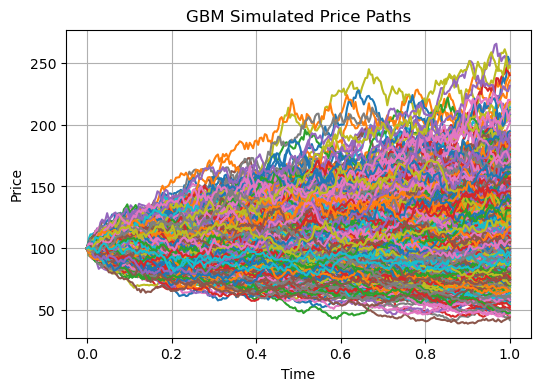

In [4]:
# Plot the simulated price paths
plt.figure(figsize=(6,4))
plt.plot(t, S)
plt.title('GBM Simulated Price Paths')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### 2.2 Analytical Method

Utilizes vectorized operations to compute cumulative sums of log return increments.

In [5]:
# Initialize an array to store the simulated paths
S = np.zeros((N+1, M))
S[0, :] = S0

# Simulate the GBM process
W = ss.norm.rvs(loc=(mu - sigma**2 / 2) * dt, scale=sigma * np.sqrt(dt), size=(N, M), random_state=42
    )
S[1:, :] = S0 * np.exp(np.cumsum(W, axis=0))

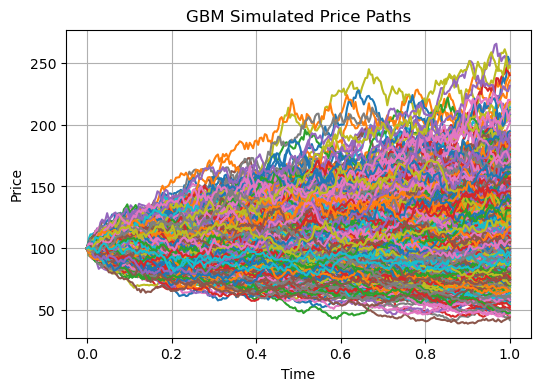

In [6]:
# Plot the simulated price paths
plt.figure(figsize=(6,4))
plt.plot(t, S)
plt.title('GBM Simulated Price Paths')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### 2.3 Multivariate GBM

GBM can be extended to the case where there are multiple correlated price paths. Each price path follows the underlying process:

$$ dS_{t}^{i} = \mu_i S_{t}^{i} \, dt + \sigma_i S_{t}^{i} \, dW_{t}^{i} $$

where the Wiener processes are correlated such that $\mathbb{E}(dW_t^i dW_t^j) = \rho_{i,j} dt$ where $\rho_{i,i} = 1$. 

For the multivariate case, this implies that:

$$ \mathrm{Cov}(S_{t}^{i}, \, S_{t}^{j}) = S_{0}^{i} \, S_{0}^{j} e^{(\mu_i + \mu_j) t} (e^{\rho_{i,j} \, \sigma_{i} \sigma_{j} t} - 1) $$

A multivariate formulation that maintains the driving Brownian motions $W_{t}^{i}$ independent is:

$$ dS_{t}^{i} = \mu_i S_{t}^{i} \, dt + \sum_{j=1}^{d} \sigma_{i,j} S_{t}^{i} \, dW_{t}^{j} $$

where the correlation between $S_{t}^{i}$ and $S_{t}^{j}$ is now expressed through the $\sigma_{i,j} = \rho_{i,j} \, \sigma_i \sigma_j$ terms.

In [7]:
# Define parameters 
T = 1.0                                         # time horizon
N = 252                                         # number of steps within time horizon
t = np.linspace(0, T, N+1)                      # from 0 to T with N+1 points (inclusive of T)
dt = T / N                                      # time step increment
M = 1000                                        # number of simulations
mu = np.array([0.1, 0.12])                      # drift coefficents for each asset per unit T
sigma = np.array([0.3, 0.27])                   # volatility coefficients for each asset per unit T
S0 = np.array([100.0, 80.0])                    # initial asset prices
num_endog = len(S0)                             # number of assets
cov = np.array([[0.09, 0.04], [0.04, 0.07]])    # covariance matrix

In [8]:
# Initialize an array to store the simulated paths
S = np.zeros((N+1, M, num_endog))
S[0, :, :] = S0

# Simulate the GBM process
W = ss.multivariate_normal.rvs(mean=(mu - np.diag(cov) / 2) * dt, cov=cov * dt, size=(N, M), random_state=42)
S[1:, :, :] = S0 * np.exp(np.cumsum(W, axis=0))

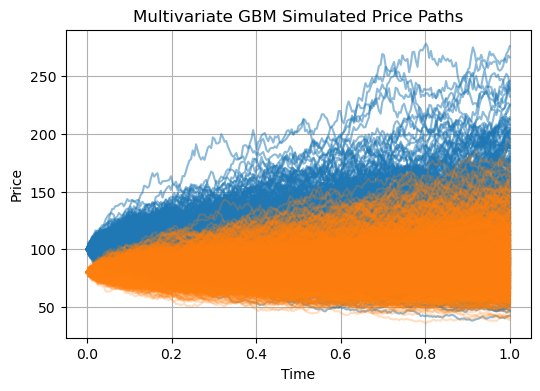

In [9]:
# Plot the simulated price paths
plt.figure(figsize=(6,4))
plt.plot(t, S[:, :, 0], color='C0', alpha=0.5)
plt.plot(t, S[:, :, 1], color='C1', alpha=0.25)
plt.title('Multivariate GBM Simulated Price Paths')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()